# RDkitで分子を操作する

> **importとは？**: ライブラリを使えるようにするおまじないのことです.  
> :exclamation: ライブラリとは便利な処理をまとめたプログラムファイルのこと

ライブラリをインポート

In [75]:
import urllib.request as req
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

Solubirity data をダウンロードしてCSV保存する

In [5]:
url = 'http://modem.ucsd.edu/adme/data/databases/logS/data_set.dat'
req.urlretrieve(url, 'water_solubility.txt') 

('water_solubility.txt', <http.client.HTTPMessage at 0x7fb10b981850>)

In [21]:
df = pd.read_csv('water_solubility.txt', sep='\t', header=None)
df.columns = ['SMILES', 'ID', 'logS']
df.to_csv('water_solubility.csv', index=False)

保存したCSVファイルを読み込む

In [22]:
df = pd.read_csv('water_solubility.csv')
df

,SMILES,ID,logS
0,O=C(C)N,60-35-5,1.58
1,NNC,60-34-4,1.34
2,O=C(C)O,64-19-7,1.22
3,N1CCCC1,123-75-1,1.15
4,O=C(N)NO,127-07-1,1.12
...,...,...,...
1285,Clc1c(c2c(ccc(Cl)c2Cl)Cl)c(ccc1Cl)Cl,38411-22-2,-8.65
1286,c1c2c(ccc3c2cccc3)cc2c1ccc1ccccc12,53-70-3,-8.66
1287,c1c2c3cccc4ccc5ccc6c(c2c(cc6)cc1)c5c43,191-24-2,-9.03
1288,Clc1c(Cl)c(c2cc(c(c(Cl)c2Cl)Cl)Cl)c(c(c1Cl)Cl)Cl,40186-72-9,-10.26


SMILESから分子を描写する

In [29]:
smiles = df['SMILES'].tolist()

In [54]:
type(smiles[0])

str

In [40]:
# []で括ったものを「リスト」という
# リストは値をしまっておくための箱のことを指す
# hoge[0]みたいに番号を指定すると中身を取り出せる
hoge = ['a', 'b', 'c']
print(type(hoge))
hoge

<class 'list'>


['a', 'b', 'c']

In [38]:
hoge[1]

'b'

In [43]:
# リストは入れ替え可能な箱
hoge[0] = 1
hoge

[1, 'b', 'c']

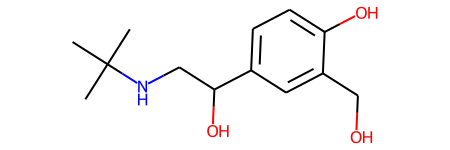

In [61]:
mol = Chem.MolFromSmiles(smiles[199])
mol

SMIELSを一括で全てmolに変換する

In [69]:
mols = []
for s in smiles:
    mol = Chem.MolFromSmiles(s)
    mols.append(mol)

RDKit WARNING: [16:07:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:10] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [16:07:10] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [16:07:10] Explicit valence for atom # 6 O, 3, is greater than permitted
[16:07:10] WARNING: not removing hydrogen atom without neighbors
[16:07:10] WARNING: not removing hydrogen atom without neighbors
[16:07:10] WARNING: not removing hydrogen atom without neighbors
[16:07:10] Explicit valence for atom # 6 O, 3, is greater than permitted


In [76]:
hoge = [1,2,3,4,5]
hoge

[1, 2, 3, 4, 5]

In [77]:
hoge[0]

1

In [79]:
hoge[:2]

[1, 2]

In [82]:
hoge[1:3]

[2, 3]

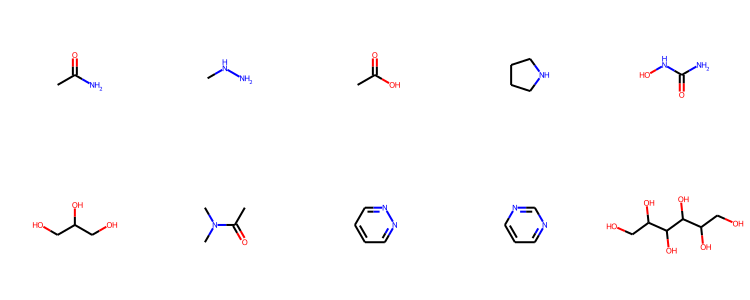

In [90]:
Draw.MolsToGridImage(mols[:10], molsPerRow=5, subImgSize=(150,150))